In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#Cargo el archivo CSV 
data = pd.read_csv('data/original_cafe_sales.csv')

#muestro las primeras filas para entender la estructura del dataset
print("\nPrimera filas del dataset:")
data.head()

# Información general de las columnas
print("\nInformación del dataset:")
data.info()


# Revisar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe(include="all"))

#Identifico columnas con problemas como valores faltantes (NaN), 
#valores inconsistentes (e.g., "UNKNOWN"), y columnas con datos en el formato incorrecto.


Primera filas del dataset:

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB

Estadísticas descriptivas:
       Transaction ID   Item Quantity Price Per Unit Total Spent  \
count           10000   9667     9862           9821        9827   
unique          10000     10        7              8          19   
top       TXN_1961373  Juice        5            3.0         6.0   
freq                1   1171     2013

### INSPECCION DE DATOS: 

**TransactionID:** identificador único para cada transacción
**Item:** el producto comprado
**Quantity:** la cantidad comprada
**Price Per Unit:** el precio unitario del producto
**Total Spent:** el total pagado
**Payment Method:** el metodo de pago
**Location:** Lugar donde se efectuo la compra
**Transaction Date:** la fecha de la transaccion

**Análisis:**

1. Hay valores UNKNOWN y ERROR en las columnas categóricas (Payment Method, Item, Location, Total Spent, Transaction Date).

2. Hay valores faltantes (NaN) en las columnas:
    Quantity (441 valores faltantes)
    Price Per Unit (491 valores faltantes)
    Transaction Date (144 valores faltantes)

3. Las columnas Quantity y Price Per Unit deberían ser completamente numéricas.
4. La columna Item contiene valores incorrectos como UNKNOWN y ERROR.


In [47]:

# Contar valores faltantes en cada columna
print("\nValores faltantes por columna:")
print(data.isnull().sum())

# Buscar valores 'UNKNOWN' y 'ERROR' en columnas específicas
print("\nValores únicos en columnas categóricas:")
print("Payment Method:", data['Payment Method'].unique())
print("Item:", data['Item'].unique())
print("Location:", data['Location'].unique())
print("Total Spent:", data['Total Spent'].unique())
print("Transaction Date:", data['Transaction Date'].unique())
#Confirmamos qué columnas tienen problemas y qué tipo de problemas son (faltantes, valores no válidos, etc.).


Valores faltantes por columna:
Transaction ID         0
Item                 333
Quantity             138
Price Per Unit       179
Total Spent          173
Payment Method      2579
Location            3265
Transaction Date     159
dtype: int64

Valores únicos en columnas categóricas:
Payment Method: ['Credit Card' 'Cash' 'UNKNOWN' 'Digital Wallet' 'ERROR' nan]
Item: ['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' 'UNKNOWN' 'Sandwich' nan
 'ERROR' 'Juice' 'Tea']
Location: ['Takeaway' 'In-store' 'UNKNOWN' nan 'ERROR']
Total Spent: ['4.0' '12.0' 'ERROR' '10.0' '20.0' '9.0' '16.0' '15.0' '25.0' '8.0' '5.0'
 '3.0' '6.0' nan 'UNKNOWN' '2.0' '1.0' '7.5' '4.5' '1.5']
Transaction Date: ['2023-09-08' '2023-05-16' '2023-07-19' '2023-04-27' '2023-06-11'
 '2023-03-31' '2023-10-06' '2023-10-28' '2023-07-28' '2023-12-31'
 '2023-11-07' 'ERROR' '2023-05-03' '2023-06-01' '2023-03-21' '2023-11-15'
 '2023-06-10' '2023-02-24' '2023-03-25' '2023-01-15' '2023-04-04'
 '2023-03-30' '2023-12-01' '2023-09-18' '202

### LIMPIEZA DE DATOS

### Limpieza de columnas categóricas
Primero abordemos las columnas categóricas con valores no válidos (UNKNOWN, ERROR) y decidamos qué hacer.
Convertiremos UNKNOWN y ERROR en NaN, y luego evaluaremos si es viable rellenar los datos faltantes o eliminarlos.

In [48]:
# Reemplazo 'UNKNOWN' y 'ERROR' con NaN 
categorical_columns = ["Payment Method", "Item", "Location", "Transaction Date" , "Total Spent"]
data[categorical_columns] = data[categorical_columns].replace(["UNKNOWN", "ERROR"], np.nan)

# Reviso valores únicos nuevamente
print("\nValores únicos después de reemplazar 'UNKNOWN' y 'ERROR':")
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")



Valores únicos después de reemplazar 'UNKNOWN' y 'ERROR':
Payment Method: ['Credit Card' 'Cash' nan 'Digital Wallet']
Item: ['Coffee' 'Cake' 'Cookie' 'Salad' 'Smoothie' nan 'Sandwich' 'Juice' 'Tea']
Location: ['Takeaway' 'In-store' nan]
Transaction Date: ['2023-09-08' '2023-05-16' '2023-07-19' '2023-04-27' '2023-06-11'
 '2023-03-31' '2023-10-06' '2023-10-28' '2023-07-28' '2023-12-31'
 '2023-11-07' nan '2023-05-03' '2023-06-01' '2023-03-21' '2023-11-15'
 '2023-06-10' '2023-02-24' '2023-03-25' '2023-01-15' '2023-04-04'
 '2023-03-30' '2023-12-01' '2023-09-18' '2023-06-03' '2023-12-13'
 '2023-04-20' '2023-04-10' '2023-03-11' '2023-06-02' '2023-11-06'
 '2023-08-15' '2023-10-09' '2023-05-28' '2023-07-17' '2023-04-29'
 '2023-06-08' '2023-06-29' '2023-04-17' '2023-12-22' '2023-01-10'
 '2023-10-02' '2023-02-23' '2023-03-22' '2023-11-03' '2023-03-02'
 '2023-06-26' '2023-05-02' '2023-09-05' '2023-01-08' '2023-03-15'
 '2023-11-25' '2023-12-05' '2023-03-19' '2023-06-27' '2023-04-19'
 '2023-10-07' 

### Limpieza de Columnas
Las columnas Quantity y Price Per Unit contienen valores faltantes (NaN) y deben ser completamente numéricas. Vamos a convertirlas a números usando pd.to_numeric.

Convierto las columnas a valores numéricos, reemplazando cualquier error con NaN.


### Eliminar Filas con NaN en Columnas 
eliminar filas donde las columnas tengan valores NaN, primero aplico un filtro para eliminarlas.

In [49]:
data = data.dropna(subset=["Item", "Total Spent", "Transaction Date", "Location"])

# Verificar si aún quedan NaN en estas columnas
print("Valores faltantes después de eliminar NaN:")
print(data[["Item", "Total Spent", "Transaction Date", "Location"]].isnull().sum())


Valores faltantes después de eliminar NaN:
Item                0
Total Spent         0
Transaction Date    0
Location            0
dtype: int64


Paso 2: Rellenar Valores Faltantes en Columnas Numéricas con el Promedio
Para las columnas Quantity y Price Per Unit, rellenaremos los valores NaN con el promedio de cada columna

In [50]:
# Relleno valores faltantes en columnas numéricas con el promedio
for col in numeric_columns:
    mean_value = data[col].mean()
    data[col] = data[col].fillna(mean_value)
    print(f"{col} rellenado con su promedio: {mean_value:.2f}")

# Verificar que no queden valores NaN en columnas numéricas
print("\nValores faltantes en columnas numéricas después de rellenar:")
print(data[numeric_columns].isnull().sum())



NameError: name 'numeric_columns' is not defined

In [51]:
# Resumen actualizado
print("\nResumen actualizado del dataset:")
print(data.info())

# Estadísticas descriptivas actualizadas
print("\nEstadísticas descriptivas después de limpieza:")
print(data.describe(include="all"))

# Reviso valores únicos nuevamente
print("\nValores únicos después de reemplazar 'UNKNOWN' y 'ERROR':")
for col in categorical_columns:
    print(f"{col}: {data[col].unique()}")

data.tail(30)
data.sample(20)


Resumen actualizado del dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 4936 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    4936 non-null   object
 1   Item              4936 non-null   object
 2   Quantity          4864 non-null   object
 3   Price Per Unit    4851 non-null   object
 4   Total Spent       4936 non-null   object
 5   Payment Method    3415 non-null   object
 6   Location          4936 non-null   object
 7   Transaction Date  4936 non-null   object
dtypes: object(8)
memory usage: 347.1+ KB
None

Estadísticas descriptivas después de limpieza:
       Transaction ID   Item Quantity Price Per Unit Total Spent  \
count            4936   4936     4864           4851        4936   
unique           4936      8        7              8          17   
top       TXN_1961373  Salad        5            3.0        12.0   
freq                1    651      995 

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
6450,TXN_5220527,Cookie,4,1.0,4.0,Digital Wallet,Takeaway,2023-08-06
611,TXN_2265984,Cookie,5,1.0,5.0,Credit Card,Takeaway,2023-10-18
3307,TXN_1765281,Smoothie,3,4.0,12.0,Credit Card,In-store,2023-01-28
425,TXN_8048037,Sandwich,2,4.0,8.0,Digital Wallet,Takeaway,2023-03-31
8075,TXN_5171248,Cake,5,3.0,15.0,Digital Wallet,In-store,2023-06-14
4130,TXN_5115009,Cake,4,3.0,12.0,NaN,Takeaway,2023-02-21
9021,TXN_9455679,Salad,5,5.0,25.0,NaN,Takeaway,2023-05-18
4048,TXN_1486576,Sandwich,4,4.0,16.0,NaN,Takeaway,2023-09-10
677,TXN_6830557,Coffee,3,2.0,6.0,Digital Wallet,Takeaway,2023-11-08
6018,TXN_8126586,Sandwich,5,4.0,20.0,NaN,In-store,2023-11-19


## Preguntas clave para el análisis: Comportamiento del cliente
### ¿Qué productos son los más vendidos?

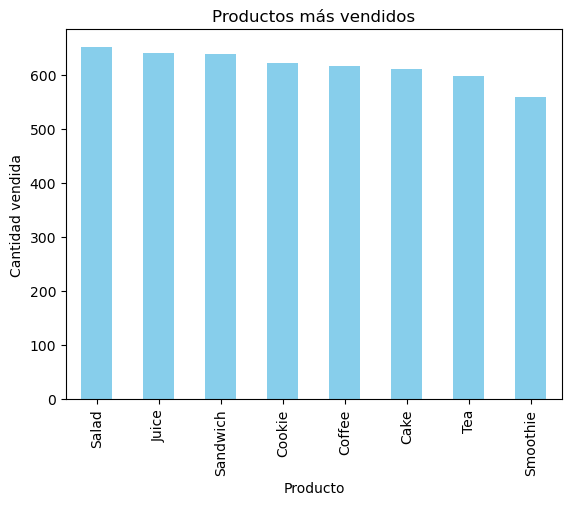

In [52]:
# Contar las ventas por producto
item_counts = data['Item'].value_counts()

# Graficar productos más vendidos
item_counts.plot(kind='bar', title='Productos más vendidos', color='skyblue')
plt.xlabel('Producto')
plt.ylabel('Cantidad vendida')
plt.savefig("imagenes/productos_mas_vendidos.png", dpi=300, bbox_inches="tight")
plt.show()

### ¿Cuál es la ubicación más rentable?


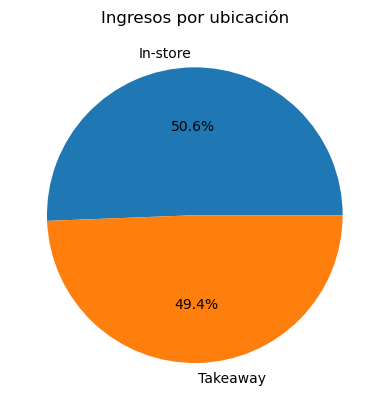

In [53]:

# Aseguro de que 'Total Spent' sea numérico 
data['Total Spent'] = pd.to_numeric(data['Total Spent'], errors='coerce')

# Eliminar filas con NaN si es necesario
data = data.dropna(subset=['Total Spent'])

# Sumar ingresos por ubicación
location_revenue = data.groupby('Location')['Total Spent'].sum()

# Graficar ingresos por ubicación
location_revenue.plot(kind='pie', autopct='%1.1f%%', title='Ingresos por ubicación')
plt.ylabel('')
plt.savefig("imagenes/ingresos_por_ubicacion", dpi=300, bbox_inches="tight")
plt.show()



### ¿Qué métodos de pago son los más utilizados?

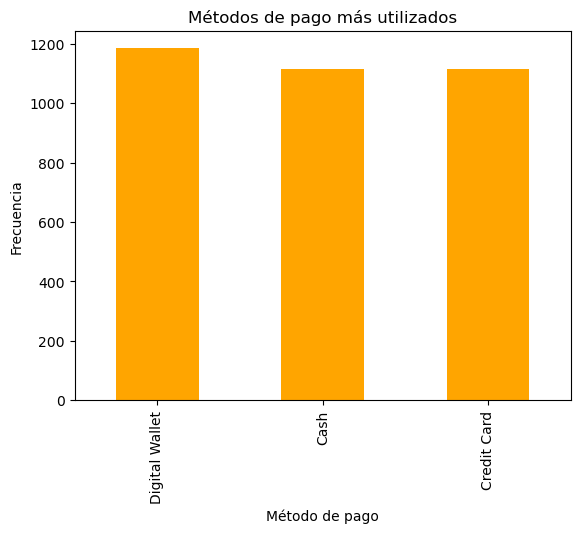

In [54]:
# Contar métodos de pago
payment_counts = data['Payment Method'].value_counts()

# Graficar métodos de pago
payment_counts.plot(kind='bar', title='Métodos de pago más utilizados', color='orange')
plt.xlabel('Método de pago')
plt.ylabel('Frecuencia')
plt.savefig("imagenes/metodos_de_pago.png", dpi=300, bbox_inches="tight")
plt.show()


## Preguntas clave para el análisis: Rentabilidad

#### ¿Cuáles son los días más rentables?

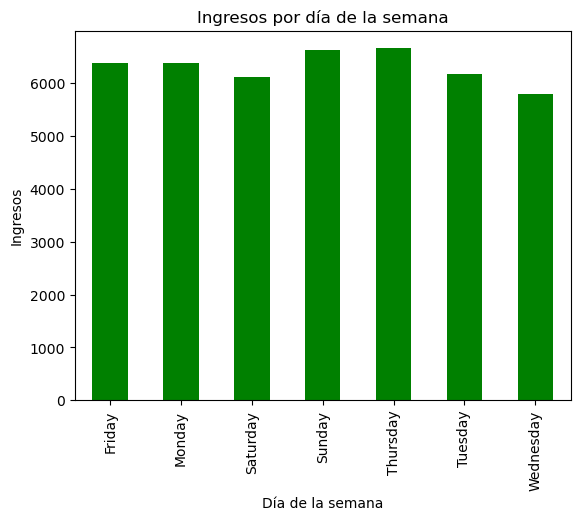

In [55]:
# Convertir columna "Transaction Date" a formato datetime
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])


# Extraer día de la semana
data['Day of Week'] = data['Transaction Date'].dt.day_name()

# Sumar ingresos por día
day_revenue = data.groupby('Day of Week')['Total Spent'].sum()

# Graficar ingresos por día
day_revenue.plot(kind='bar', title='Ingresos por día de la semana', color='green')
plt.xlabel('Día de la semana')
plt.ylabel('Ingresos')
plt.savefig("imagenes/dias_mas_rentables.png", dpi=300, bbox_inches="tight")
plt.show()


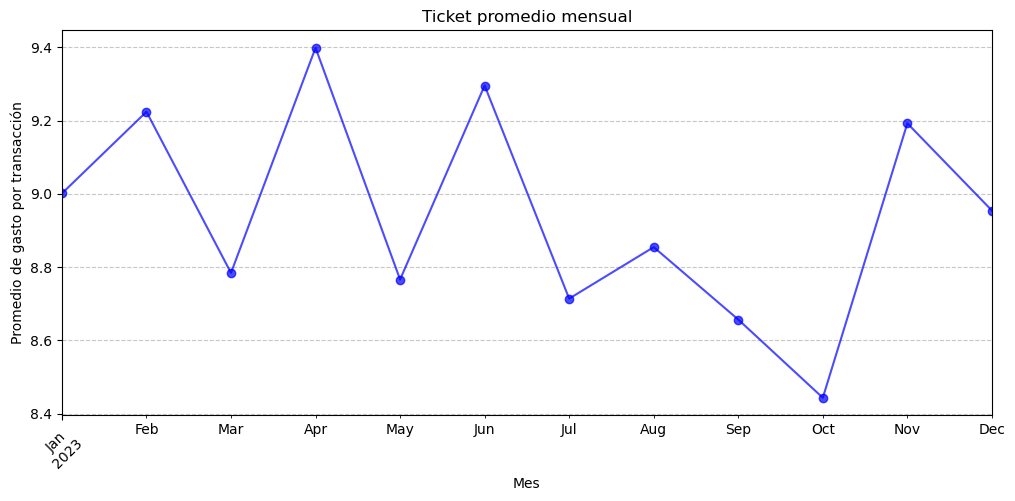

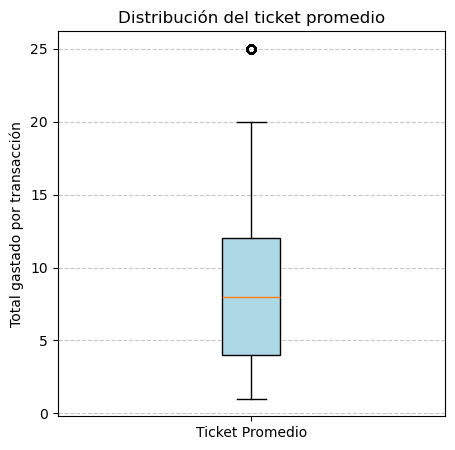

In [56]:
# Convertir 'Transaction Date' a datetime
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])

# Calcular el ticket promedio por mes
avg_ticket_per_month = data.groupby(data['Transaction Date'].dt.to_period('M'))['Total Spent'].mean()

# Graficar el ticket promedio por mes
plt.figure(figsize=(12,5))
avg_ticket_per_month.plot(kind='line', marker='o', color='blue', alpha=0.7)
plt.title('Ticket promedio mensual')
plt.xlabel('Mes')
plt.ylabel('Promedio de gasto por transacción')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("imagenes/ticket_promedio_mensual.png", dpi=300, bbox_inches="tight")
plt.show()

# ticket promedio por cliente
ticket_per_client = data.groupby('Transaction ID')['Total Spent'].sum()

# Boxplot para visualizar la distribución del ticket promedio
plt.figure(figsize=(5,5))
plt.boxplot(ticket_per_client, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Distribución del ticket promedio')
plt.ylabel('Total gastado por transacción')
plt.xticks([1], ['Ticket Promedio'])  # Etiqueta personalizada para el eje X
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("imagenes/distribucion_ticket_promedio.png", dpi=300, bbox_inches="tight")
plt.show()



### 📊 Interpretación del Boxplot del Ticket Promedio

1️⃣ **Mediana (línea naranja en el centro de la caja)**  
   - La mitad de las transacciones tienen un gasto menor a este valor y la otra mitad un gasto mayor.  
   - Parece estar cerca de **$7-$8**, lo que significa que el **ticket promedio más común** está en ese rango.  

2️⃣ **Rango intercuartil (IQR - la caja azul)**  
   - **El 50% de las transacciones están entre aproximadamente $3 y $12.**  
   - Esto indica que la mayoría de los clientes gasta dentro de este rango en cada compra.  

3️⃣ **Bigotes (líneas negras que se extienden desde la caja)**  
   - Representan el rango en el que caen la mayoría de las transacciones.  
   - **El ticket promedio más bajo está cerca de $1 y el más alto cerca de $20.**  

4️⃣ **Outlier (punto negro arriba de los bigotes)**  
   - Es un gasto anormalmente alto, alrededor de **$25.**  
   - Esto puede indicar una compra grande o un cliente que compró muchos productos en una sola transacción.  

💡 **Conclusión**  
- La mayoría de los clientes gasta entre **$3 y $12** en una compra.  
- Hay transacciones de **$1 a $20**, pero algunas pocas superan **$25**, lo que podría indicar pedidos grandes o especiales.  
- Si queremos aumentar el ticket promedio, podríamos analizar qué productos compran los clientes con tickets más altos.  



 ### 📊 Próximo Análisis: ¿Por qué el ticket promedio es más bajo en Septiembre y Octubre?

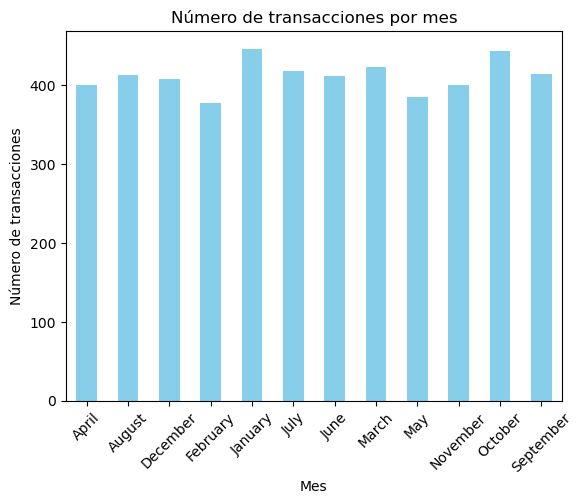

In [57]:
# Extraer el mes de la columna "Transaction Date"
data['Month'] = data['Transaction Date'].dt.month_name()

# Contar número de transacciones por mes
transactions_per_month = data.groupby('Month')['Transaction ID'].nunique()

# Graficar
transactions_per_month.sort_index().plot(kind='bar', color='skyblue', title='Número de transacciones por mes')
plt.xlabel('Mes')
plt.ylabel('Número de transacciones')
plt.xticks(rotation=45)
plt.savefig("imagenes/transacciones_por_mes.png", dpi=300, bbox_inches="tight")
plt.show()


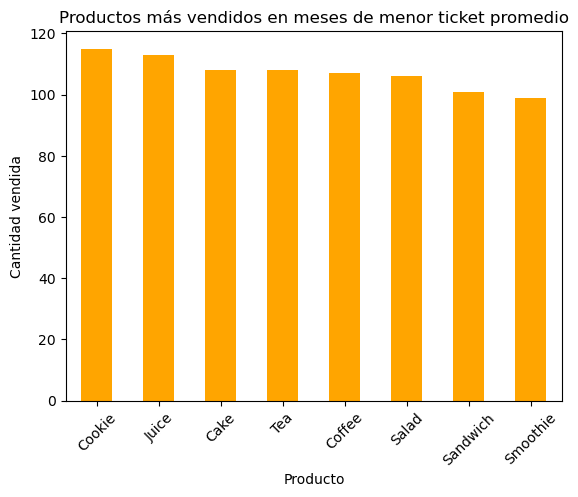

In [58]:
# Filtrar solo los meses de interés
meses_bajos = ['September', 'October']
data_bajos = data[data['Month'].isin(meses_bajos)]

# Contar cuántas veces se vendió cada producto
productos_mas_vendidos = data_bajos['Item'].value_counts()

# Graficar
productos_mas_vendidos.plot(kind='bar', color='orange', title='Productos más vendidos en meses de menor ticket promedio')
plt.xlabel('Producto')
plt.ylabel('Cantidad vendida')
plt.xticks(rotation=45)
plt.savefig("imagenes/productos_mas_vendidos_peores_meses.png", dpi=300, bbox_inches="tight")
plt.show()




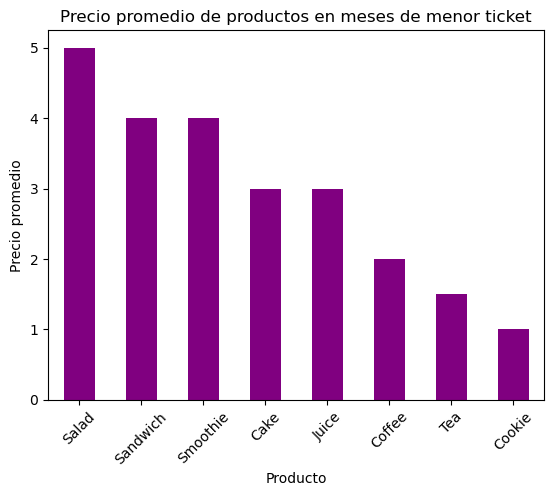

In [59]:

# Asegurar que 'Price Per Unit' es numérico, convirtiendo errores en NaN
data['Price Per Unit'] = pd.to_numeric(data['Price Per Unit'], errors='coerce')

# Filtrar los datos de meses con bajo ticket promedio
data_bajos = data[data['Transaction Date'].dt.month.isin([9, 10])]

# Calcular el precio promedio de cada producto en esos meses
precio_promedio_bajos = data_bajos.groupby('Item')['Price Per Unit'].mean().sort_values(ascending=False)

# Graficar
precio_promedio_bajos.plot(kind='bar', color='purple', title='Precio promedio de productos en meses de menor ticket')
plt.xlabel('Producto')
plt.ylabel('Precio promedio')
plt.xticks(rotation=45)
plt.savefig("imagenes/precio_promedio_productos_peores_meses", dpi=300, bbox_inches="tight")
plt.show()

## 📊 Análisis de los Productos Más Vendidos y su Relación con el Ticket Promedio  

### 🔹 Observaciones  
- Durante los meses de septiembre y octubre, el **ticket promedio** fue el más bajo del año.  
- En estos meses, los productos **más vendidos** fueron:  
  1. **Tea**  
  2. **Salad**  
  3. **Cookie**  
  4. **Sandwich**  
  5. **Coffee**  
  6. **Juice**  
  7. **Cake**  
  8. **Smoothie**  

### 🔹 Relación Precio - Ventas  
Al analizar el **precio promedio** de cada producto, encontramos que:  
✅ **Salad es el producto con mayor precio** en estos meses.  
✅ **Los productos más vendidos (Tea, Cookie, Coffee, Juice) son los de menor precio**.  
✅ **Esto confirma que el bajo ticket promedio en estos meses se debe a una mayor venta de productos económicos**.  

### 🔹 Posibles Causas  
📌 **Cambio en el comportamiento del cliente**: Prefieren opciones más económicas en estos meses.  
📌 **Se ofrecieron promociones o descuentos en productos de bajo precio**.  
📌 **Estacionalidad**: Factores externos pueden influir en el gasto promedio de los clientes.  

### 🔹 Próximo Análisis  
Para complementar este estudio, exploraremos:  
🔹 **Ingresos generados por cada categoría de producto** → ¿Los productos más vendidos generan más ingresos?  
🔹 **Margen de contribución** → ¿Es rentable vender más de los productos baratos o deberíamos incentivar los más costosos?  


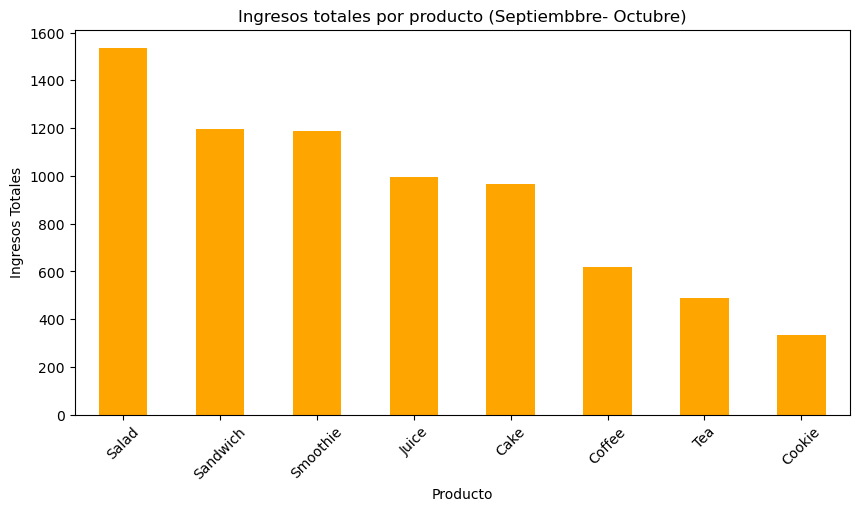

In [60]:
# Filtrar datos de los meses con bajo ticket promedio
data_bajos = data[data['Transaction Date'].dt.month.isin([9, 10])]

# Calcular ingresos totales por producto
ingresos_por_producto = data_bajos.groupby('Item')['Total Spent'].sum().sort_values(ascending=False)

# Graficar los ingresos por producto
plt.figure(figsize=(10, 5))
ingresos_por_producto.plot(kind='bar', color='orange', title='Ingresos totales por producto (Septiembbre- Octubre)')
plt.xlabel('Producto')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45)
plt.savefig("imagenes/ingresos_totales_peores_meses.png", dpi=300, bbox_inches="tight")
plt.show()


## 📊 Análisis de Ingresos por Producto (Agosto - Octubre)  

### 🔹 Observaciones  
- **Salad, Sandwich y Smoothie** son los productos que más ingresos generan.  
- **Tea y Cookie**, aunque están entre los más vendidos, aportan los menores ingresos.  
- Esto confirma que el bajo ticket promedio en estos meses se debe a la venta masiva de productos de bajo costo.  

### 🔹 Conclusión  
✅ **Vender más no siempre significa generar más ingresos**.  
✅ **El ticket promedio bajo se explica porque los clientes prefieren productos económicos en estos meses**.  
✅ **Estrategia recomendada**: Incentivar la compra de productos de mayor valor para mejorar la rentabilidad.  

### 🔹 Próximo Análisis  
Para complementar este estudio, analizaremos:  
🔹 **Margen de contribución por producto** → ¿Qué tan rentable es vender cada uno de estos productos?  


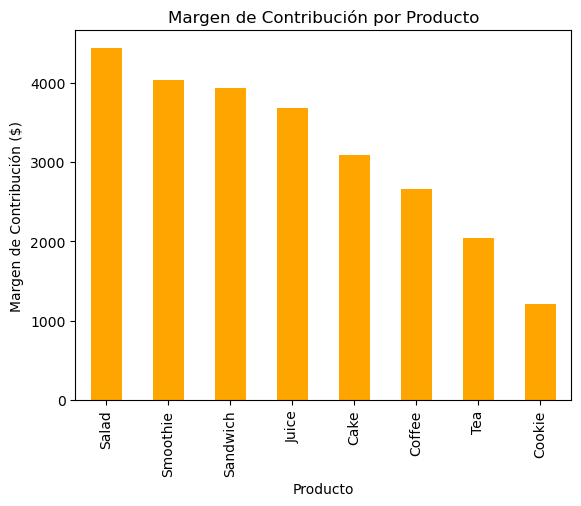

,Ingresos Totales,Margen Contribución
Item,,
Salad,9860.0,4437.000
Smoothie,6716.0,4029.600
Sandwich,7864.0,3932.000
Juice,5661.0,3679.650
Cake,5610.0,3085.500
Coffee,3794.0,2655.800
Tea,2731.5,2048.625
Cookie,1863.0,1210.950


In [61]:
# Definir los márgenes estimados por categoría
margenes = {
    'Coffee': 0.70,
    'Tea': 0.75,
    'Smoothie': 0.60,
    'Juice': 0.65,
    'Cake': 0.55,
    'Sandwich': 0.50,
    'Salad': 0.45,
    'Cookie': 0.65
}

# Crear una nueva columna con el margen de contribución
data['Margen Contribucion'] = data.apply(lambda row: row['Total Spent'] * margenes.get(row['Item'], 0), axis=1)

# Agrupar por producto y sumar el margen total
ingreso_por_producto = data.groupby('Item')['Total Spent'].sum()
margen_por_producto = data.groupby('Item')['Margen Contribucion'].sum()

# Crear DataFrame con resultados
margen_df = pd.DataFrame({'Ingresos Totales': ingreso_por_producto, 'Margen Contribución': margen_por_producto})
margen_df.sort_values(by='Margen Contribución', ascending=False, inplace=True)

# Graficar el margen de contribución por producto
margen_df['Margen Contribución'].plot(kind='bar', color='orange', title='Margen de Contribución por Producto')
plt.xlabel('Producto')
plt.ylabel('Margen de Contribución ($)')
plt.savefig("imagenes/MC_por_producto.png", dpi=300, bbox_inches="tight")
plt.show()

# Mostrar resultados
margen_df


## 🥗 Análisis del Margen de Contribución por Producto  

### 🔍 **Interpretación de los resultados**  
El análisis del margen de contribución revela que algunos productos, aunque no sean los más vendidos en unidades, generan la mayor rentabilidad para el negocio.  

### 📊 **Productos con mayor margen de contribución**  
- **Salad** 🥗 ($4,437.00) → Producto más rentable, con un precio de venta elevado y un costo de producción relativamente bajo.  
- **Smoothie** 🥤 ($4,029.60) y **Sandwich** 🥪 ($3,932.00) → También tienen altos márgenes, lo que indica que son productos clave para la rentabilidad.  

### 📉 **Productos con menor margen de contribución**  
- **Cookie** 🍪($1,210.95) → Menor margen, posiblemente debido a su bajo precio de venta.  
- **Tea** 🍵 ($2,048.63) y **Coffee** ☕ ($2,655.80) → Aunque se venden en volumen, no generan tanto margen como otros productos.  

### 🤔 **¿Por qué Salad es el más rentable?**  
A pesar de que los vegetales son ingredientes económicos, hay varios factores que explican su alto margen:  
✅ **Precio de venta alto** Percepción de producto saludable y premium.  
✅ **Bajo costo de ingredientes**  No requiere insumos costosos como pan, proteínas procesadas o lácteos.  
✅ **Menos desperdicio**  A diferencia de panadería o jugos, los ingredientes pueden aprovecharse mejor sin tanto desperdicio.  

### 🚀 **Conclusión y posibles estrategias**  
1️⃣ **Impulsar la venta de Salad, Smoothie y Sandwich** con promociones o combos.  
2️⃣ **Evaluar opciones para mejorar el margen de Coffee, Tea y Cookie**, como ajustes de precio o estrategias de upselling.  
3️⃣ **Explorar si Salad se vende más en ciertos días o clientes específicos** para personalizar promociones.  
